In [ ]:
from ucimlrepo import fetch_ucirepo

heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
y = heart_disease.data.targets

print("columns in y:")
print(y.columns)


columns in y:
Index(['num'], dtype='object')


In [21]:
y = y['num']

print("X shape:", X.shape)
print("y shape:", y.shape)

print("class distribution")
print(y.value_counts())


X shape: (303, 13)
y shape: (303,)
class distribution
num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

y_binary = y.apply(lambda x: 0 if x == 0 else 1)

print("class distribution after converting to binary:")
print(y_binary.value_counts())

print("number of missing values in each column:")
print(X.isnull().sum())

X_filled = X.copy()
X_filled['ca'] = X_filled['ca'].fillna(X_filled['ca'].median())
X_filled['thal'] = X_filled['thal'].fillna(X_filled['thal'].median())

print("checking the missing values again:")
print(X_filled.isnull().sum())

# normalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)


class distribution after converting to binary:
num
0    164
1    139
Name: count, dtype: int64
number of missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64
checking the missing values again:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


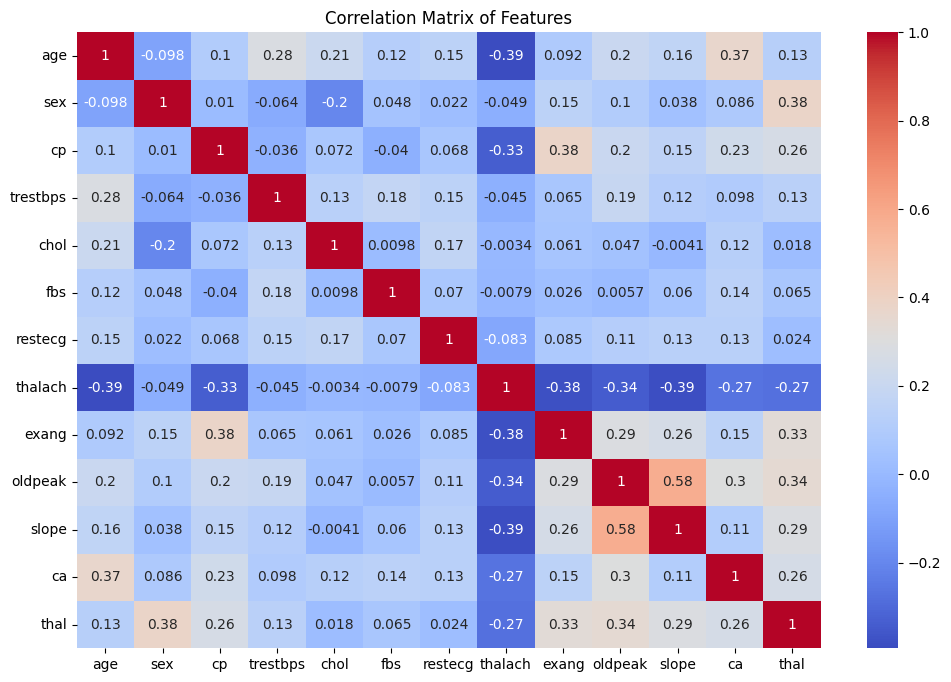


(Spearman correlation):
thal        0.518714
ca          0.488104
cp          0.472006
exang       0.431894
oldpeak     0.413382
slope       0.364425
sex         0.276816
age         0.236674
restecg     0.169277
trestbps    0.128166
chol        0.121122
fbs         0.025264
thalach    -0.423467
dtype: float64


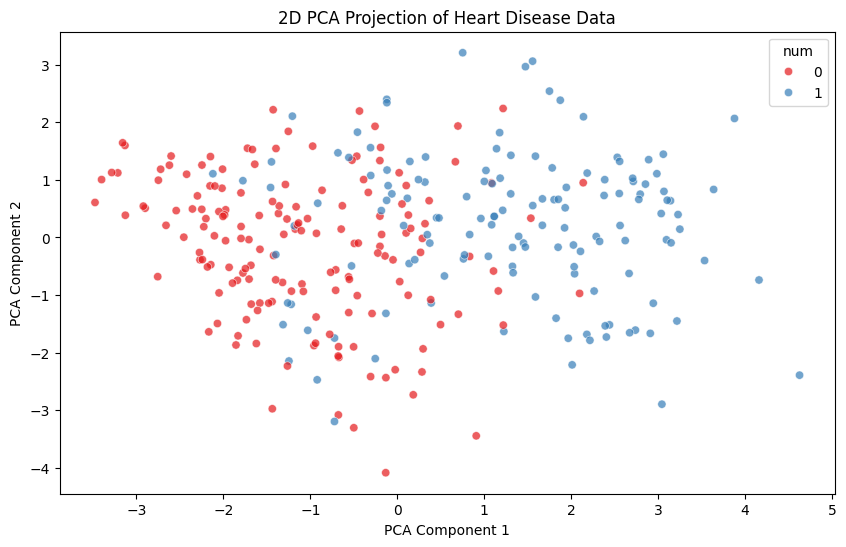

[0.23687279 0.12307138]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

corr_matrix = X_scaled_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

corr_with_target = X_filled.apply(lambda x: x.corr(y_binary, method='spearman'))
print("\n(Spearman correlation):")
print(corr_with_target.sort_values(ascending=False))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_binary, palette='Set1', alpha=0.7)
plt.title('2D PCA Projection of Heart Disease Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

print(pca.explained_variance_ratio_)


In [ ]:
selected_features = ['thal', 'ca', 'cp', 'exang', 'oldpeak', 'slope', 'sex', 'age', 'thalach']

X_selected = X_filled[selected_features]

X_selected_scaled = scaler.fit_transform(X_selected)

In [ ]:
from sklearn.model_selection import train_test_split

X_selected = X_filled[selected_features]
X_selected_scaled = scaler.fit_transform(X_selected)

X_train, X_test, y_train, y_test = train_test_split(X_selected_scaled, y_binary, test_size=0.2, random_state=42, stratify=y_binary)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = list(range(1, 21))
distance_metrics = ['euclidean', 'manhattan']

best_score = 0
best_params = {'k': None, 'metric': None}

accuracy_results = {}

for metric in distance_metrics:
    accuracies = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
        if acc > best_score:
            best_score = acc
            best_params['k'] = k
            best_params['metric'] = metric
    accuracy_results[metric] = accuracies


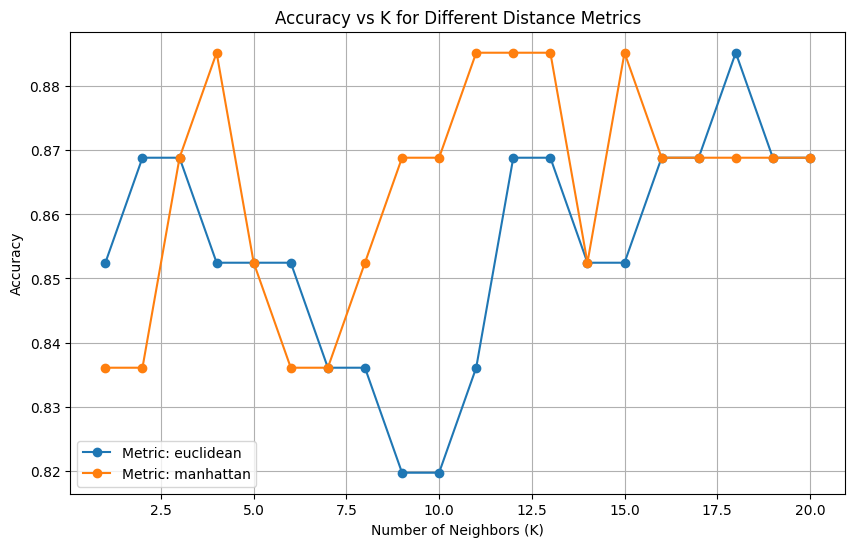

best accuracy: 0.8852 با K = 18 and distance metric = euclidean


In [25]:
plt.figure(figsize=(10,6))
for metric in distance_metrics:
    plt.plot(k_values, accuracy_results[metric], marker='o', label=f'Metric: {metric}')
plt.title('Accuracy vs K for Different Distance Metrics')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

print(f"best accuracy: {best_score:.4f} با K = {best_params['k']} and distance metric = {best_params['metric']}")



گزارش طبقه‌بندی:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.86      0.89      0.88        28

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



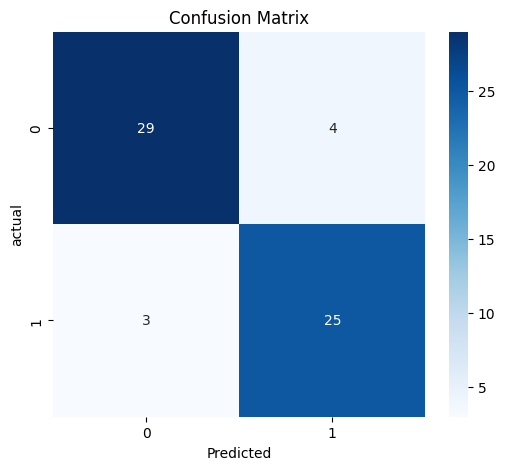

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

best_knn = KNeighborsClassifier(n_neighbors=18, metric='euclidean')
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()